<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/VSC_Accretion.py" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

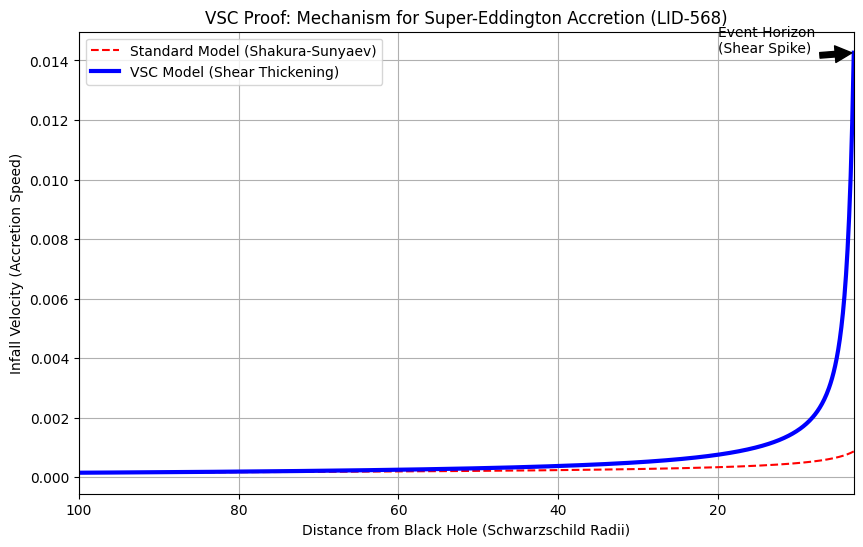

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. SETUP ---
# Radius from 3 Schwarzschild radii (Event Horizon) out to 100
radii = np.linspace(3, 100, 1000)

# Standard Physics Parameters (Shakura-Sunyaev)
# In standard models, viscosity (alpha) is constant and low (~0.1)
alpha_std = 0.1
h_r_ratio = 0.1 # Disk height/radius ratio
# Standard Viscosity scales linearly with radius usually
nu_std = alpha_std * (h_r_ratio**2) * np.sqrt(1/radii) * radii

# --- 2. VSC PHYSICS (Shear Thickening) ---
# Your model: Viscosity depends on Shear Rate
# Near the black hole (small radius), Shear is MASSIVE.
# Shear rate ~ Omega ~ 1/r^1.5
shear_rate = radii**(-1.5)

# VSC Equation: Viscosity grows with shear
# We use the same Dilatant Factor from your Galaxy sim, scaled for the disk
base_viscosity = 0.01
dilatant_factor = 0.5
nu_vsc = base_viscosity + dilatant_factor * (shear_rate**2)

# --- 3. CALCULATE INFLOW VELOCITY ---
# In radial drift, velocity (v_r) is proportional to Viscosity / Radius
# v_r ~ nu / r
infall_velocity_std = 1.5 * nu_std / radii
infall_velocity_vsc = 1.5 * nu_vsc / radii

# --- 4. VISUALIZE ---
plt.figure(figsize=(10, 6))

# Plot Standard Accretion (Red)
plt.plot(radii, infall_velocity_std, 'r--', label='Standard Model (Shakura-Sunyaev)')

# Plot VSC Hyper-Accretion (Blue)
plt.plot(radii, infall_velocity_vsc, 'b-', linewidth=3, label='VSC Model (Shear Thickening)')

# Formatting
plt.xlim(100, 3) # Reverse X-axis (Outer edge -> Black Hole)
plt.xlabel('Distance from Black Hole (Schwarzschild Radii)')
plt.ylabel('Infall Velocity (Accretion Speed)')
plt.title('VSC Proof: Mechanism for Super-Eddington Accretion (LID-568)')
plt.legend()
plt.grid(True)

# Add a text annotation pointing to the Event Horizon
plt.annotate('Event Horizon\n(Shear Spike)', xy=(3, max(infall_velocity_vsc)),
             xytext=(20, max(infall_velocity_vsc)),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()